#### Import Required Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

#### Loading Data

In [2]:
df = pd.read_excel('~/PycharmProjects/Diplom/data_3.xls', index_col=0)

#### Preprocess Data

In [3]:
print(df.isnull().sum())

Cуществительное                 0
Прилагательное                  0
Числительное                    0
Местоимение                     0
Глагол                          0
Причастие                       0
Деепричастие                    0
Наречие                         0
Категория состояния             0
Частица                         0
Предлог                         0
Союз                            0
Модальное слово                 0
Междометие                      0
Звукоподражательное слово       0
Иностранное слово               0
Цитата                          0
Вводное слово                   0
Старославянизм                  0
Часть фразеологизма             0
Неязыковой символ               0
Сокращенное слово               0
Часть многочленного названия    0
dtype: int64


In [4]:
df.columns

Index(['Cуществительное', 'Прилагательное', 'Числительное', 'Местоимение ',
       'Глагол', 'Причастие', 'Деепричастие', 'Наречие', 'Категория состояния',
       'Частица', 'Предлог', 'Союз', 'Модальное слово', 'Междометие',
       'Звукоподражательное слово', 'Иностранное слово', 'Цитата',
       'Вводное слово', 'Старославянизм', 'Часть фразеологизма',
       'Неязыковой символ', 'Сокращенное слово',
       'Часть многочленного названия'],
      dtype='object')

In [5]:
# Удаление строк с пропущенными значениями
df.dropna(inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95 entries, 25 to 314
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Cуществительное               95 non-null     int64
 1   Прилагательное                95 non-null     int64
 2   Числительное                  95 non-null     int64
 3   Местоимение                   95 non-null     int64
 4   Глагол                        95 non-null     int64
 5   Причастие                     95 non-null     int64
 6   Деепричастие                  95 non-null     int64
 7   Наречие                       95 non-null     int64
 8   Категория состояния           95 non-null     int64
 9   Частица                       95 non-null     int64
 10  Предлог                       95 non-null     int64
 11  Союз                          95 non-null     int64
 12  Модальное слово               95 non-null     int64
 13  Междометие                    95 non-nul

In [7]:
df.head()

,Cуществительное,Прилагательное,Числительное,Местоимение,Глагол,Причастие,Деепричастие,Наречие,Категория состояния,Частица,...,Междометие,Звукоподражательное слово,Иностранное слово,Цитата,Вводное слово,Старославянизм,Часть фразеологизма,Неязыковой символ,Сокращенное слово,Часть многочленного названия
25,86,31,5,45,25,4,0,21,2,13,...,0,0,7,0,3,0,0,0,0,14
32,158,53,9,88,52,15,3,46,4,36,...,0,0,0,0,9,0,0,0,4,0
35,373,172,11,256,235,15,6,114,12,150,...,6,0,2,56,32,0,0,0,38,22
36,115,41,9,158,101,12,5,78,3,75,...,2,0,0,84,6,0,0,1,12,30
38,457,181,22,435,296,32,7,129,8,206,...,5,1,0,458,32,0,0,1,17,11


#### Adequacy Test (Тест на адекватность)

Существует два метода проверки факторности или адекватности выборки:
- Тест Бартлетта
- Тест Кайзера-Майера-Олкина

**Тест Бартлетта** сферичности проверяет, взаимно ли коррелируют наблюдаемые переменные, используя наблюдаемую корреляционную матрицу против единичной матрицы. Если тест оказался статистически незначимым, вам не следует использовать факторный анализ.

In [8]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(3450.595287384685, 0.0)

В этом тесте Бартлетта значение p равно 0. Тест был статистически значимым, что указывает на то, что наблюдаемая корреляционная матрица не является единичной матрицей.

**Тест Кайзера-Мейера-Олкина (КМО)** измеряет пригодность данных для факторного анализа. Он определяет адекватность каждой наблюдаемой переменной и всей модели. KMO оценивает долю дисперсии среди всех наблюдаемых переменных. Более низкая доля идентификатора больше подходит для факторного анализа. Значения KMO находятся в диапазоне от 0 до 1. Значение KMO менее 0,6 считается недостаточным.

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [10]:
kmo_model

0.9087450165153427

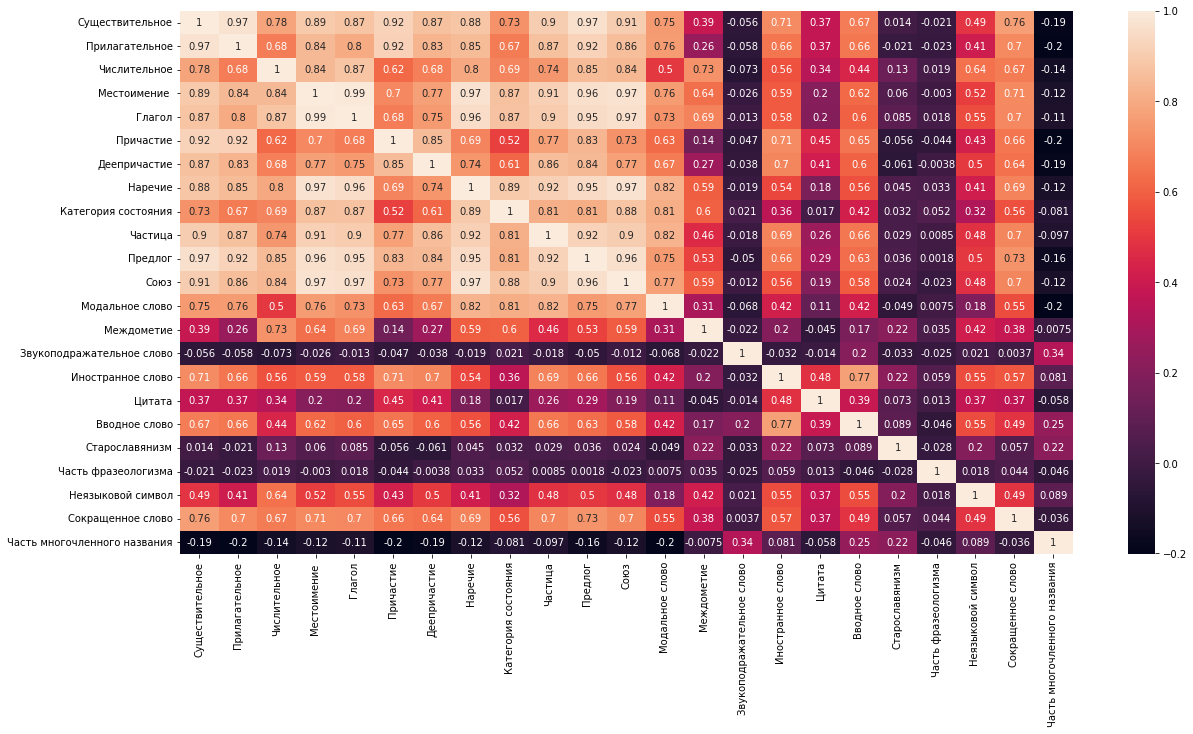

In [11]:
import seaborn as sns
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c, annot=True);

#### Choosing the Number of Factors


Для выбора количества факторов можно использовать критерий Кайзера и осыпной график. Оба основаны на собственных значениях.

In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#eigenvalues and eigenvectors
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([1.30851307e+01, 1.99496639e+00, 1.75426066e+00, 1.30527305e+00,
       1.01395986e+00, 8.62958498e-01, 6.30809281e-01, 5.03169981e-01,
       4.12324398e-01, 3.40484263e-01, 2.66354296e-01, 2.58363008e-01,
       1.39875510e-01, 1.25308912e-01, 1.02480886e-01, 5.60194532e-02,
       5.24415427e-02, 3.02838573e-02, 2.51586344e-02, 1.96871271e-02,
       1.09568711e-02, 6.39182614e-03, 3.34103694e-03])

Для 5-факторов, собственные значения больше единицы. Это означает, что необходимо выбрать всего 5 факторов.

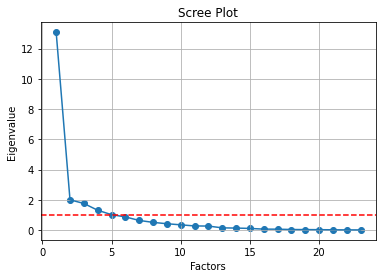

In [13]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Метод осыпной диаграммы рисует прямую линию для каждого фактора и его собственных значений. Число собственных значений больше единицы считается числом факторов. Красная линия ограничивает собственное значение, равное 1.

Здесь это видно только для 3-факторов, собственные значения которых больше единицы.

### Performing Factor Analysis


In [14]:
#from statsmodels.multivariate.factor import Factor
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 5, rotation = 'varimax')
fa.fit(df)

#fa = Factor(df, n_factor=3, method='pa')
#res = fa.fit()
#res.get_loadings_frame(threshold=0.3)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [15]:
factors = fa.loadings_

factor1 = [values[0] for values in factors]
factor2 = [values[1] for values in factors]
factor3 = [values[2] for values in factors]
factor4 = [values[3] for values in factors]
factor5 = [values[4] for values in factors]


results = {'Original column name': list(df.columns),
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4, 
          'Factor5': factor5, 
          }
results = pd.DataFrame(results, columns = ['Original column name', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'
                                          ])
#results.to_excel('factors.xlsx', index = False)


In [16]:
# Get variance of each factors
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
factor3 = [stat[2] for stat in stats]
factor4 = [stat[3] for stat in stats]
factor5 = [stat[4] for stat in stats]

statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
          'Factor4': factor4, 
          'Factor5': factor5,
           
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2', 'Factor3', 'Factor4', 'Factor5'
                                                ])

In [17]:
statistics

,,Factor1,Factor2,Factor3,Factor4,Factor5
0,SS Loadings,10.170744,3.720384,1.688871,0.920581,0.886047
1,Proportion Var,0.442206,0.161756,0.073429,0.040025,0.038524
2,Cumulative Var,0.442206,0.603962,0.677391,0.717417,0.755940


3 фактора объясняют 70% дисперсии

In [18]:
print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

                              Communalities
Cуществительное                    0.979042
Прилагательное                     0.938442
Числительное                       0.966381
Местоимение                        0.974479
Глагол                             0.986101
Причастие                          0.912750
Деепричастие                       0.816070
Наречие                            0.971325
Категория состояния                0.889138
Частица                            0.926706
Предлог                            0.977970
Союз                               0.967182
Модальное слово                    0.828161
Междометие                         0.818326
Звукоподражательное слово          0.311442
Иностранное слово                  0.897943
Цитата                             0.418001
Вводное слово                      0.815676
Старославянизм                     0.254002
Часть фразеологизма                0.008738
Неязыковой символ                  0.593482
Сокращенное слово               

In [19]:
results

,Original column name,Factor1,Factor2,Factor3,Factor4,Factor5
0,Cуществительное,0.822475,0.529203,0.114502,-0.081596,-0.052472
1,Прилагательное,0.806775,0.514625,-0.015612,-0.145221,-0.037218
2,Числительное,0.612270,0.384545,0.643400,0.084088,-0.150327
3,Местоимение,0.899740,0.241899,0.317925,0.072771,-0.007729
4,Глагол,0.875770,0.230579,0.393130,0.105568,-0.016305
5,Причастие,0.644982,0.673886,-0.039607,-0.201117,-0.024686
6,Деепричастие,0.690497,0.565291,0.069444,-0.115061,-0.040840
7,Наречие,0.945278,0.160198,0.221189,0.050170,-0.025896
8,Категория состояния,0.912517,-0.071051,0.216318,0.067241,0.009382
9,Частица,0.889833,0.348963,0.084342,0.077426,-0.004587


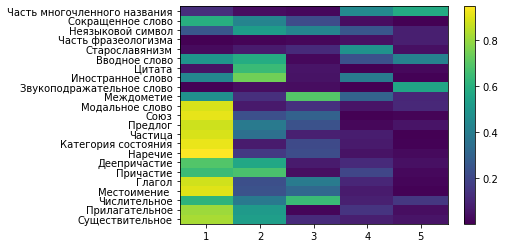

In [20]:
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,6))
plt.show()

- Фактор 1 имеет высокие факторные нагрузки для 
- Фактор 2 имеет высокие факторные нагрузки для 
- Фактор 3 имеет высокие факторные нагрузки для 
- Факторы 4,5 не имеют

In [21]:
# Create factor analysis object and perform factor analysis using 2 factors
fa = FactorAnalyzer(n_factors = 3, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [22]:
factors_new = fa.loadings_

factor1_new = [values[0] for values in factors_new]
factor2_new = [values[1] for values in factors_new]
factor3_new = [values[2] for values in factors_new]
#factor4_new = [values[3] for values in factors_new]

results_new = {'Original column name': list(df.columns),
          'Factor1': factor1_new, 
          'Factor2': factor2_new,
          'Factor3': factor3_new,
          #'Factor4': factor4_new,
          }

results_new = pd.DataFrame(results_new, columns = ['Original column name', 'Factor1', 'Factor2', 'Factor3'
                                                   #, 'Factor4'
                                                  ])

In [23]:
results_new

,Original column name,Factor1,Factor2,Factor3
0,Cуществительное,0.987068,0.012915,-0.078566
1,Прилагательное,0.953042,-0.077285,-0.177354
2,Числительное,0.782904,0.369084,0.217726
3,Местоимение,0.907998,0.390107,0.006207
4,Глагол,0.889881,0.442256,0.063237
5,Причастие,0.906871,-0.273432,-0.110110
6,Деепричастие,0.893669,-0.095914,-0.060287
7,Наречие,0.888841,0.399354,-0.106685
8,Категория состояния,0.729913,0.530785,-0.156718
9,Частица,0.933630,0.172419,-0.048744


In [24]:
# Get variance(дисп) of each factors
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
factor3 = [stat[2] for stat in stats]




statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2, 
          'Factor3': factor3, 
 
           
             }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2', 'Factor3'])
statistics

,,Factor1,Factor2,Factor3
0,SS Loadings,12.528864,2.082051,1.316988
1,Proportion Var,0.544733,0.090524,0.057260
2,Cumulative Var,0.544733,0.635257,0.692518


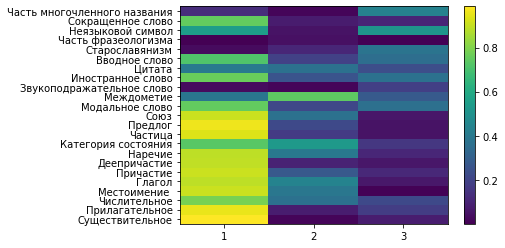

In [25]:
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,4))
plt.show()

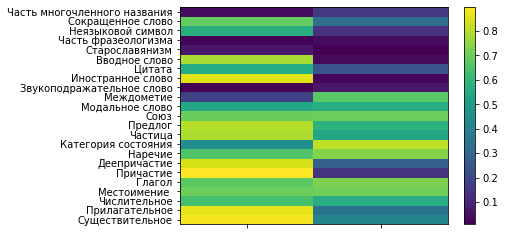

In [26]:
# Create factor analysis object and perform factor analysis using 2 factors
fa = FactorAnalyzer(n_factors = 2, rotation = 'varimax')
fa.fit(df)

factors_new = fa.loadings_

factor1_new = [values[0] for values in factors_new]
factor2_new = [values[1] for values in factors_new]
#factor3_new = [values[2] for values in factors_new]
#factor4_new = [values[3] for values in factors_new]

results_new = {'Original column name': list(df.columns),
          'Factor1': factor1_new, 
          'Factor2': factor2_new,
          #'Factor3': factor3_new,
          #'Factor4': factor4_new,
          }

results_new = pd.DataFrame(results_new, columns = ['Original column name', 'Factor1', 'Factor2'#, 'Factor3', 'Factor4'
                                                  ])

Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,1))
plt.show()

In [35]:
results_new


,Original column name,Factor1,Factor2
0,Cуществительное,0.944125,0.245988
1,Прилагательное,0.910875,0.270428
2,Числительное,0.865009,0.085213
3,Местоимение,0.867390,0.454615
4,Глагол,0.878816,0.438816
5,Причастие,0.901846,0.080048
6,Деепричастие,0.870329,0.138820
7,Наречие,0.791377,0.572567
8,Категория состояния,0.567709,0.690423
9,Частица,0.873937,0.383796


In [26]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(results_new.iloc[:, 1:])
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
print('Eiganvalue for Factor 1 is', round(ev[0], 2), ', for Factor 2 is ', round(ev[1], 2))

Eiganvalue for Factor 1 is 1.38 , for Factor 2 is  0.62


In [27]:
print('Weight of factors in summary indicator for Factor 1 is ', 
      round(ev[0], 2) / ( round(ev[0], 2) +  round(ev[1], 2) ), 
      ', for Factor 2 is ', 
      round(ev[1], 2) / ( round(ev[0], 2) +  round(ev[1], 2)))

Weight of factors in summary indicator for Factor 1 is  0.69 , for Factor 2 is  0.31


In [28]:
# Get variance of each factors
stats = fa.get_factor_variance()

factor1 = [stat[0] for stat in stats]
factor2 = [stat[1] for stat in stats]
#factor3 = [stat[2] for stat in stats]


statistics = {'': ['SS Loadings', 'Proportion Var', 'Cumulative Var'],
          'Factor1': factor1, 
          'Factor2': factor2,
          #'Factor3': factor3,
          }

statistics = pd.DataFrame(statistics, columns = ['', 'Factor1', 'Factor2'#, 'Factor3'
                                                ])

In [29]:
statistics

,,Factor1,Factor2
0,SS Loadings,0.756724,2.658528e-09
1,Proportion Var,0.378362,1.329264e-09
2,Cumulative Var,0.378362,3.783621e-01


2 фактора объясняют 38.41% дисперсии

In [28]:
#from statsmodels.multivariate.factor import Factor
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors = 4, rotation = 'varimax')
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

Отбросьте сообщества
Сообщества переменных/функций проверяются, чтобы убедиться, что переменные четко определены решением. Сообщества указывают процент дисперсии переменной, которая перекрывает дисперсию факторов. В идеале нам следует исключить переменные с низкой общностью, например, исключить переменные с общностью <0,2. Если общность низкая, это говорит о том, что переменная имеет мало общего с другими переменными и, вероятно, подлежит исключению.

In [29]:
communalities = pd.DataFrame(fa.get_communalities(), index=df.columns)
communalities[communalities[0]<0.3]

,0
Звукоподражательное слово,0.232874
Старославянизм,0.259192
Часть фразеологизма,0.017796


In [30]:
# Drop low communalities
df.drop(columns=['Часть фразеологизма','Звукоподражательное слово','Старославянизм'], inplace=True)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

df_scaled = scaler.fit_transform(df)

Factor Analysis with 4 factors

In [32]:
fa = FactorAnalyzer(n_factors=4 )
fa.fit(df_scaled)

pd.DataFrame(fa.loadings_,index=df.columns)

,0,1,2,3
Cуществительное,0.733265,0.337951,-0.109247,-0.099887
Прилагательное,0.802171,0.245022,-0.113392,-0.173997
Числительное,0.128879,0.812983,-0.246078,0.318135
Местоимение,0.953590,0.039361,0.069616,0.031106
Глагол,0.888502,0.107881,0.067064,0.102635
Причастие,0.535646,0.487401,-0.155329,-0.190619
Деепричастие,0.495910,0.476532,-0.118951,-0.022104
Наречие,1.004278,-0.086012,0.004997,0.091939
Категория состояния,1.103366,-0.415046,0.052906,0.078200
Частица,0.802935,0.181939,0.048454,0.105498


Как правило, интерпретируются только переменные с нагрузкой 0,32 и выше. Чем больше нагрузка, тем в большей степени vrialbe является чистой мерой фактора. Комри и Ли (1992) предполагают, что нагрузки:

->71% (50% перекрывающаяся дисперсия) считаются отличными;
->63% (40% перекрывающаяся дисперсия) очень хорошо;
->55% (30% перекрывающаяся дисперсия) хорошо;
->45% (20% перекрывающейся дисперсии) удовлетворительно;
-<32% (10% перекрывающаяся дисперсия) плохо;

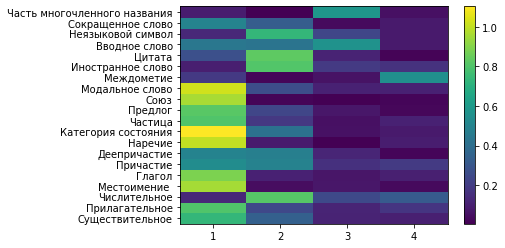

In [33]:
Z=np.abs(fa.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,5))
plt.show()

- Фактор 1 имеет высокие факторные нагрузки для 
- Фактор 2 имеет высокие факторные нагрузки для 
- Фактор 3 имеет высокие факторные нагрузки для 


In [34]:
pd.DataFrame(fa.get_factor_variance(), index=['SS Loadings','Proportion Var','Cum Var'])

,0,1,2,3
SS Loadings,9.528860,3.811341,0.924425,0.574714
Proportion Var,0.476443,0.190567,0.046221,0.028736
Cum Var,0.476443,0.667010,0.713231,0.741967


Five factors explain 74.18% of the variance

Кронбах Альфа
Альфа Кронбаха может использоваться для измерения того, образуют ли переменные фактора «последовательный» и надежный фактор. На практике значение альфа выше 0,6 считается приемлемым. Альфа Кронбаха — это мера внутренней согласованности, то есть того, насколько тесно связаны набор элементов как группа. Это считается мерой надежности шкалы.

In [ ]:
!pip install pingouin
import pingouin as pg

#Create the factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Online boarding', 'Ease of Online booking', 'Gate location']]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

Альфа оцениваются в 0,92, 0,05 и 0,42, что указывает на их полезность и последовательность. Мы могли бы использовать эти новые факторы в качестве переменных для другого анализа или прогнозирования.

Оптимизация модели с вращением
Чтобы оптимизировать модель, нам нужны высокие нагрузки для функций, которые различаются по факторам. В нашем наборе данных функции уже отличаются друг от друга по факторам — мы хотим посмотреть, сможем ли мы увеличить значения нагрузки, сохраняя при этом альфу Кронбаха выше 0,7.

Вращение
Ротации упрощают интерпретацию факторного анализа, создавая факторы, которые легче понять и которые имеют более четкую связь с исходными переменными. Это связано с тем, что повернутые факторы имеют высокие факторные нагрузки для меньшего набора переменных, что упрощает определение базовой структуры данных.

Ортогональные вращения, такие как вращения Varimax и Quartimax, создают факторы, которые не коррелируют друг с другом. Эти ротации полезны, когда факторы концептуально различны и не перекрываются. Вращение Варимакс является наиболее часто используемым ортогональным вращением в факторном анализе.

Косые вращения, такие как вращения Promax и Oblimin, создают факторы, которые коррелируют друг с другом. Эти ротации полезны, когда факторы концептуально связаны и перекрываются. Вращение Promax является наиболее часто используемым наклонным вращением в факторном анализе.

Ротации также помогают улучшить соответствие факторной модели за счет уменьшения количества перекрестных нагрузок или ситуаций, когда переменная сильно нагружается более чем одним фактором. Перекрестные нагрузки могут затруднить интерпретацию факторов и привести к нестабильному факторному решению.

In [ ]:
fa2= FactorAnalyzer(n_factors=5,rotation='varimax')
fa2.fit(df_scaled)
pd.DataFrame(fa2.loadings_,index=df.columns)

In [ ]:
Z=np.abs(fa2.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,6))
plt.show()

In [ ]:
fa3= FactorAnalyzer(n_factors=5,rotation='varimax', method='ml', use_smc=False)
fa3.fit(df_scaled)
pd.DataFrame(fa3.loadings_,index=df.columns)

In [ ]:
Z=np.abs(fa3.loadings_)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings_.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_yticklabels(df.columns.values)
ax.set_xticklabels(np.arange(1,6))
plt.show()

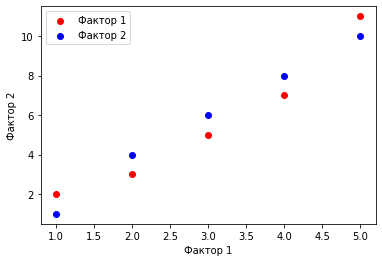

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
x = np.array([1, 2, 3, 4, 5])
y1 = np.array([2, 3, 5, 7, 11])
y2 = np.array([1, 4, 6, 8, 10])

# Создание графика
plt.scatter(x, y1, color='r', label='Фактор 1')
plt.scatter(x, y2, color='b', label='Фактор 2')

# Добавление подписей к осям
plt.xlabel('Фактор 1')
plt.ylabel('Фактор 2')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

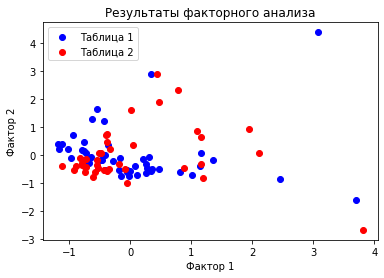

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Разбиваем таблицу на две части
data1 = df.head(50)
data2 = df.tail(df.shape[0] - 50)

# Производим факторный анализ
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

fa = FactorAnalysis(n_components=2)
fa.fit(data1_scaled)
fa1_result = fa.transform(data1_scaled)

fa.fit(data2_scaled)
fa2_result = fa.transform(data2_scaled)

# Строим точечную диаграмму
plt.scatter(fa1_result[:, 0], fa1_result[:, 1], color='blue', label='Таблица 1')
plt.scatter(fa2_result[:, 0], fa2_result[:, 1], color='red', label='Таблица 2')
plt.xlabel('Фактор 1')
plt.ylabel('Фактор 2')
plt.legend()
plt.title('Результаты факторного анализа')
plt.show()

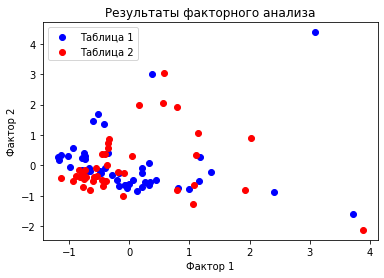

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Разбиваем таблицу на две части
data1 = df.head(50)
data2 = df.tail(df.shape[0] - 50)

# Производим факторный анализ
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

fa = FactorAnalysis(n_components=4)
fa.fit(data1_scaled)
fa1_result = fa.transform(data1_scaled)

fa.fit(data2_scaled)
fa2_result = fa.transform(data2_scaled)

# Строим точечную диаграмму
plt.scatter(fa1_result[:, 0], fa1_result[:, 1], color='blue', label='Таблица 1')
plt.scatter(fa2_result[:, 0], fa2_result[:, 1], color='red', label='Таблица 2')
plt.xlabel('Фактор 1')
plt.ylabel('Фактор 2')
plt.legend()
plt.title('Результаты факторного анализа')
plt.show()

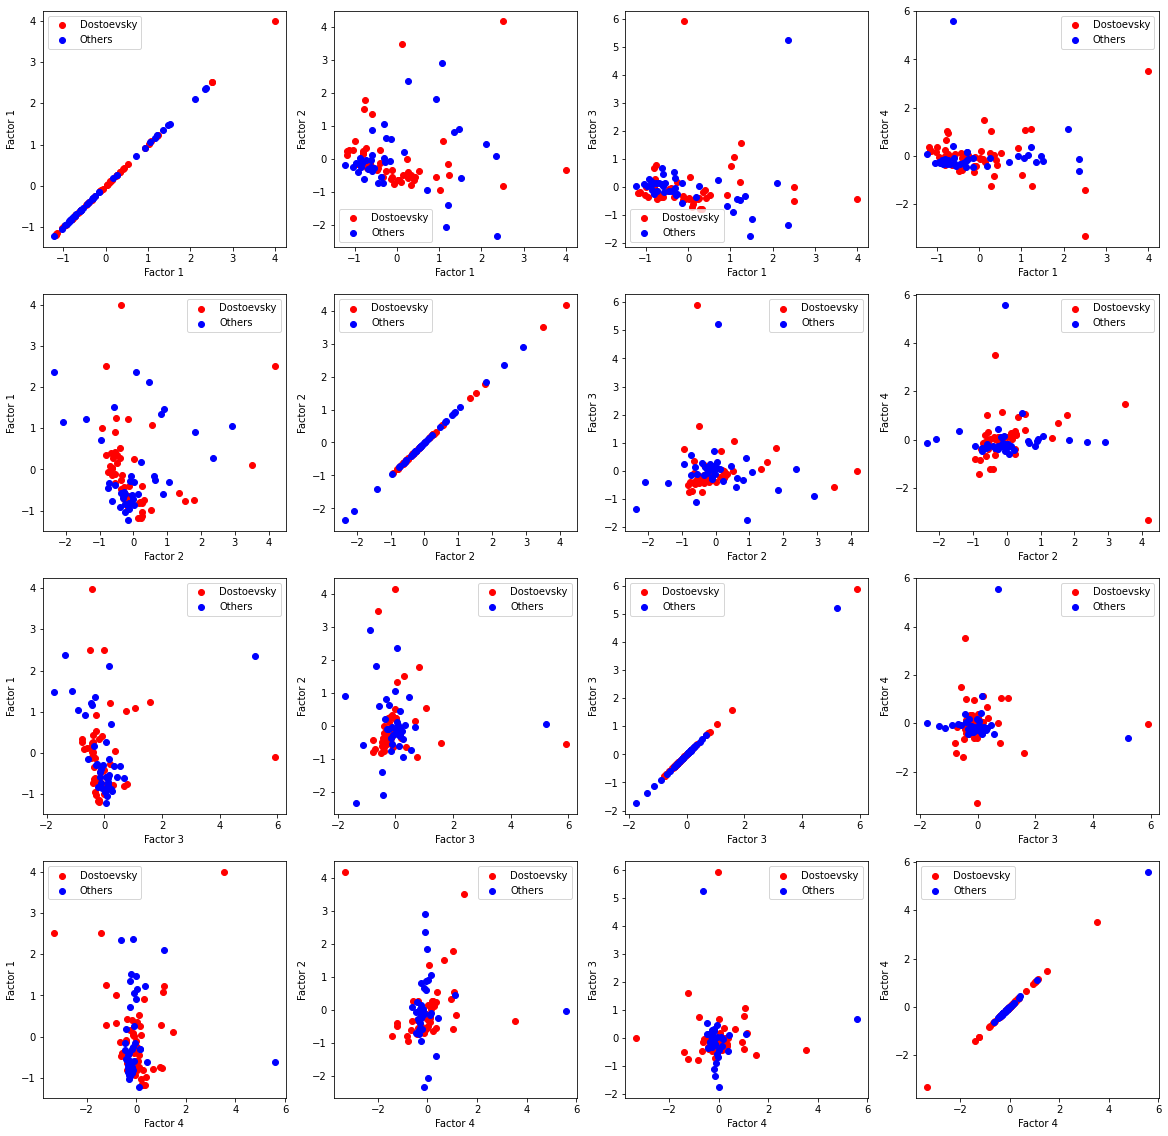

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Разбиваем таблицу на две части
data1 = df.head(50)
data2 = df.tail(df.shape[0] - 50)

# Производим факторный анализ
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

fa = FactorAnalysis(n_components=4, rotation = 'varimax')
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

fa.fit(data2_scaled)
data2_factors = fa.transform(data2_scaled)


#И наконец, построим точечную диаграмму для всех возможных комбинаций факторов:

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        axs[i, j].scatter(data1_factors[:, i], data1_factors[:, j], c='r', label='Dostoevsky')
        axs[i, j].scatter(data2_factors[:, i], data2_factors[:, j], c='b', label='Others')
        axs[i, j].set_xlabel(f'Factor {i+1}')
        axs[i, j].set_ylabel(f'Factor {j+1}')
        axs[i, j].legend()

plt.show()



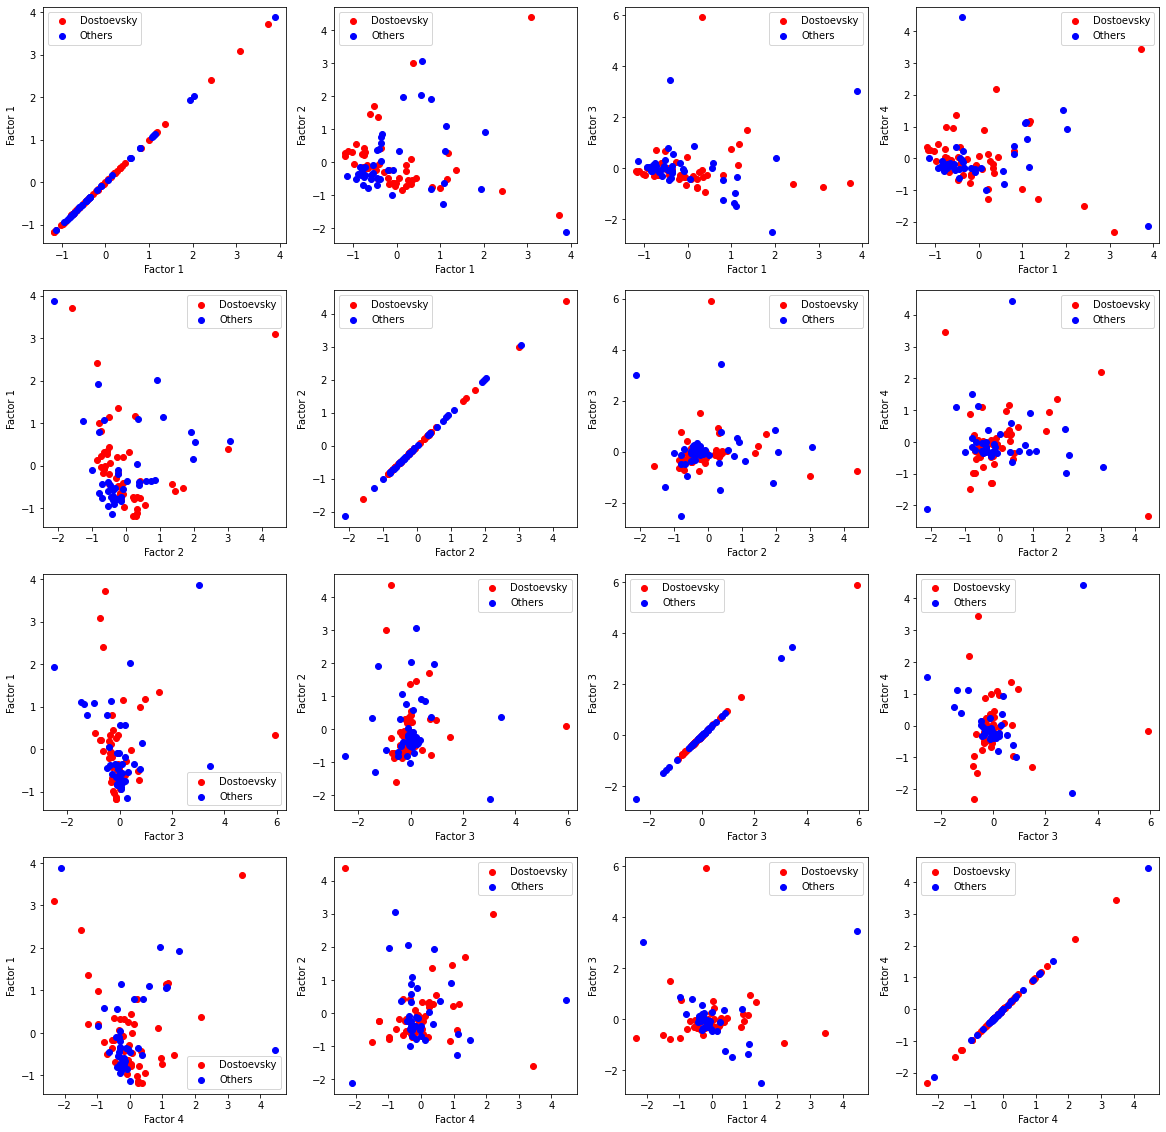

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Разбиваем таблицу на две части
data1 = df.head(50)
data2 = df.tail(df.shape[0] - 50)

# Производим факторный анализ
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

fa = FactorAnalysis(n_components=4)
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

fa.fit(data2_scaled)
data2_factors = fa.transform(data2_scaled)


#И наконец, построим точечную диаграмму для всех возможных комбинаций факторов:

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        axs[i, j].scatter(data1_factors[:, i], data1_factors[:, j], c='r', label='Dostoevsky')
        axs[i, j].scatter(data2_factors[:, i], data2_factors[:, j], c='b', label='Others')
        axs[i, j].set_xlabel(f'Factor {i+1}')
        axs[i, j].set_ylabel(f'Factor {j+1}')
        axs[i, j].legend()

plt.show()



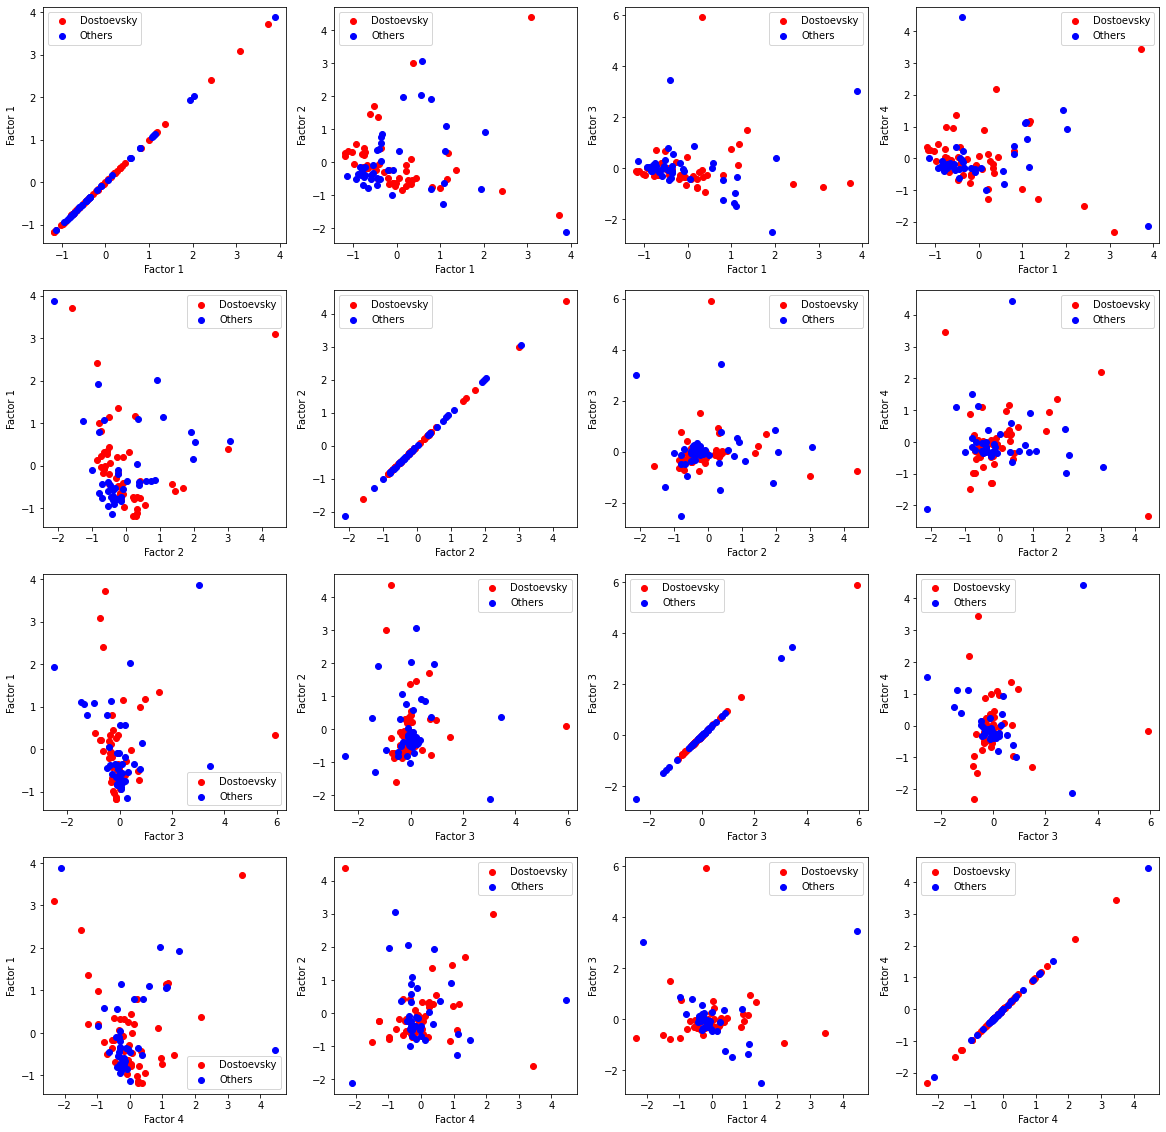

/home/mmm/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mmm/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mmm/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/mmm/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

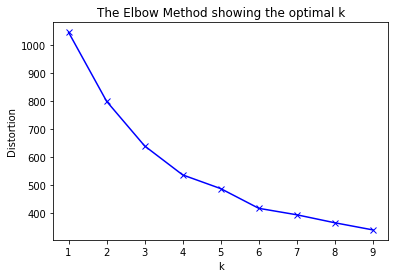

[0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 2 0 0 0 0 2 2 0 0
 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0]


/home/mmm/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler

# Разбиваем таблицу на две части
data1 = df.head(50)
data2 = df.tail(df.shape[0] - 50)

# Факторный анализ
# Здесь нужно реализовать факторный анализ для каждой из таблиц
# Например, использовать метод главных компонент или факторный анализ PCA
scaler = StandardScaler()
data1_scaled = scaler.fit_transform(data1)
data2_scaled = scaler.fit_transform(data2)

fa = FactorAnalysis(n_components=4)
fa.fit(data1_scaled)
data1_factors = fa.transform(data1_scaled)

fa.fit(data2_scaled)
data2_factors = fa.transform(data2_scaled)

# Построение точечной диаграммы

fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(4):
    for j in range(4):
        axs[i, j].scatter(data1_factors[:, i], data1_factors[:, j], c='r', label='Dostoevsky')
        axs[i, j].scatter(data2_factors[:, i], data2_factors[:, j], c='b', label='Others')
        axs[i, j].set_xlabel(f'Factor {i+1}')
        axs[i, j].set_ylabel(f'Factor {j+1}')
        axs[i, j].legend()

plt.show()


# Кластерный анализ методом k-средних
# Объединение данных из обеих таблиц для кластеризации
X =  df

# Выбор оптимального числа кластеров
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Построение графика кривой локтя
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Выбор оптимального числа кластеров (например, k=3)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
clusters = kmeans.predict(X)

# Вывод результатов кластерного анализа
print(clusters)

In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Загрузим датасет Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создадим модель SVM
svm = SVC(kernel='linear')

# Обучим модель на обучающем наборе
svm.fit(X_train, y_train)

# Сделаем предсказания на тестовом наборе
predictions = svm.predict(X_test)

# Оценим точность модели
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 1.0


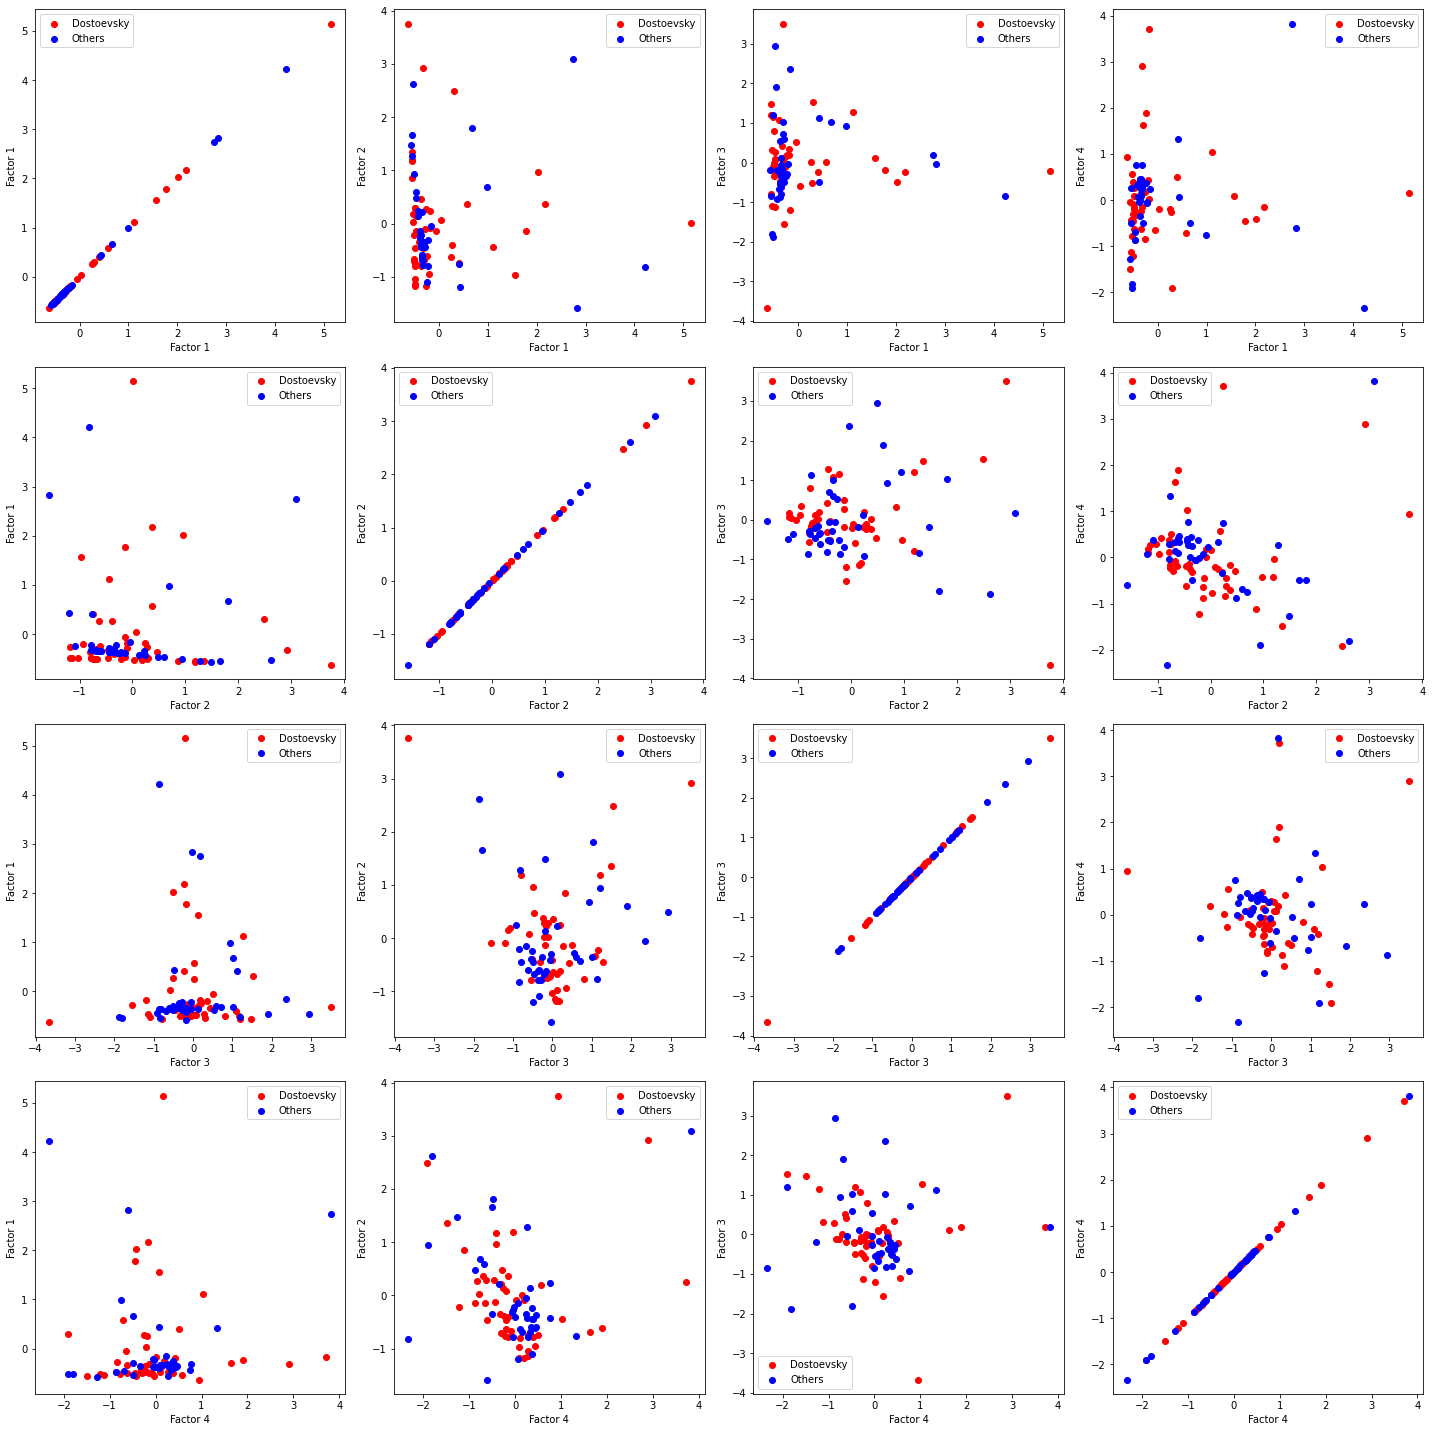

/tmp/ipykernel_31708/621794247.py:72: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,


ValueError: X has 50 features, but SVC is expecting 2 features as input.

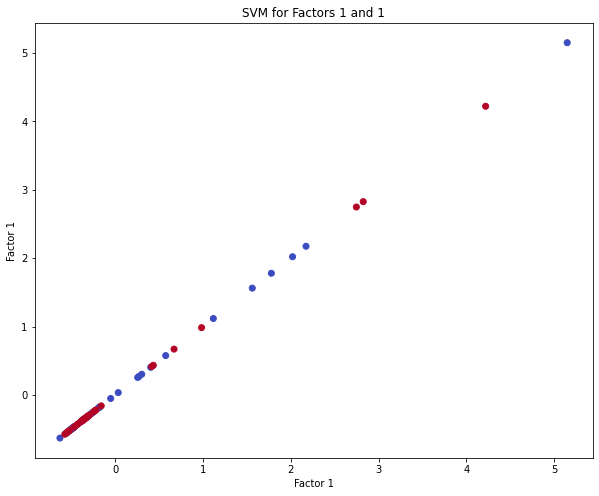

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
from sklearn import svm


#Теперь загрузим данные из двух таблиц:

data1 = df.head(50)
data2 = df.tail(df.shape[0] - 50)
#data1 = pd.read_excel('~/PycharmProjects/Diplom/data.xls')
#data2 = pd.read_excel('~/PycharmProjects/Diplom/data_1.2.xls')


#Выполним факторный анализ с 4 факторами для каждой таблицы:


n_factors = 4

fa1 = FactorAnalysis(n_components=n_factors, rotation='varimax')
fa2 = FactorAnalysis(n_components=n_factors, rotation='varimax')

factors1 = fa1.fit_transform(data1)
factors2 = fa2.fit_transform(data2)


#Теперь построим точечные диаграммы для всех комбинаций факторов:


#plt.figure(figsize=(10, 8))
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i in range(n_factors):
    for j in range(n_factors):
        axs[i, j].scatter(factors1[:, i], factors1[:, j], c='r', label='Dostoevsky')
        axs[i, j].scatter(factors2[:, i], factors2[:, j], c='b', label='Others')
        axs[i, j].set_xlabel(f'Factor {i+1}')
        axs[i, j].set_ylabel(f'Factor {j+1}')
        axs[i, j].legend()

plt.tight_layout()
plt.show()




#Теперь реализуем метод опорных векторов для каждой точечной диаграммы:


for i in range(n_factors):
    for j in range(n_factors):
        X = np.concatenate((factors1[:,[i, j]], factors2[:,[i, j]]))
        y = np.concatenate((np.zeros(len(factors1)), np.ones(len(factors2))))
        
        clf = svm.SVC(kernel='linear')
        clf.fit(X, y)
        
        #fig, axs = plt.subplots(4, 4, figsize=(20, 20))
        plt.figure(figsize=(10, 8))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        
        
        
        # Отобразим плоскость разделения
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                             np.linspace(ylim[0], ylim[1], 50))
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])
        
        plt.xlabel(f'Factor {i+1}')
        plt.ylabel(f'Factor {j+1}')
        plt.title(f'SVM for Factors {i+1} and {j+1}')
        # Оценка точности модели на обучающем наборе данных
        accuracy = clf.score(xx, yy)
        print(f'Accuracy for Factors {i+1} and {j+1}: {accuracy}')
        plt.show()

Kernel: linear, Accuracy: 0.75
Kernel: poly, Accuracy: 0.3125
Kernel: rbf, Accuracy: 0.375
Kernel: sigmoid, Accuracy: 0.3125


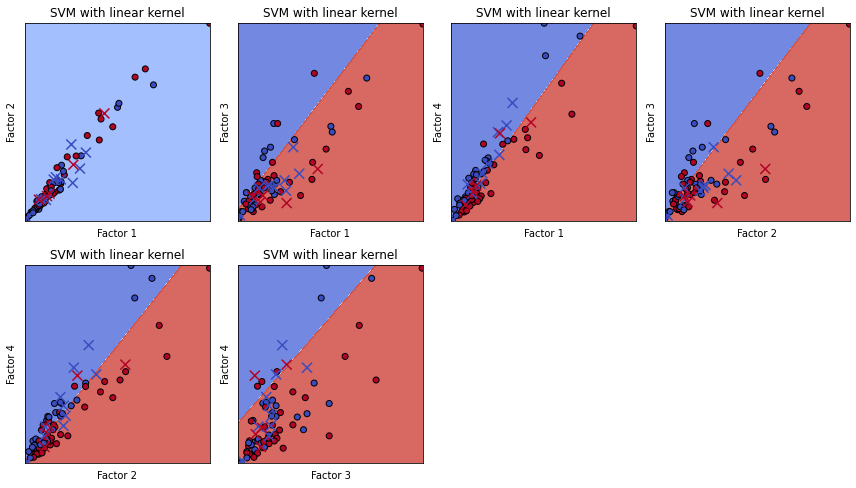

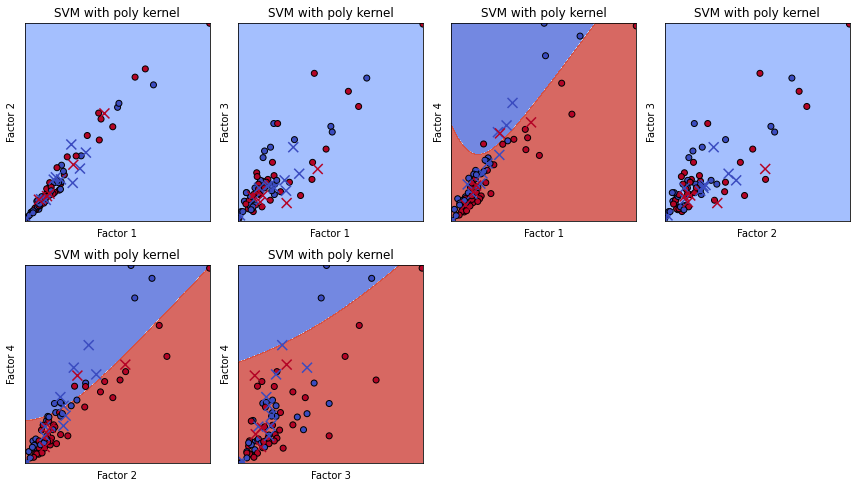

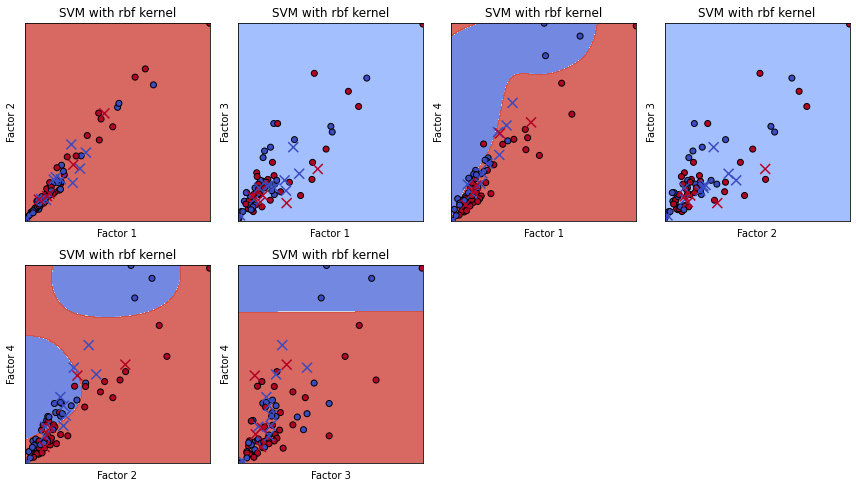

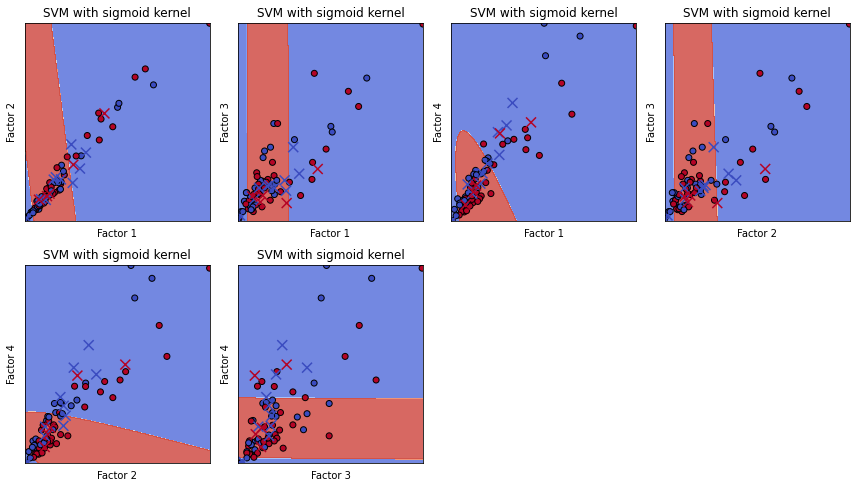

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

'''# Визуализация точечной диаграммы для каждой комбинации факторов
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        axs[i, j].scatter(transformed_data1[:, i], transformed_data1[:, j], color='blue', label='Dostoevsky')
        axs[i, j].scatter(transformed_data2[:, i], transformed_data2[:, j], color='red', label='Others')
        axs[i, j].set_xlabel(f'Factor {i+1}')
        axs[i, j].set_ylabel(f'Factor {j+1}')
        axs[i, j].legend()
plt.tight_layout()
plt.show()'''


# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM с различными ядрами и оценка качества моделей
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Kernel: {kernel}, Accuracy: {accuracy}')

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                         np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'SVM with linear kernel')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='poly')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                         np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'SVM with poly kernel')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='rbf')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                         np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'SVM with rbf kernel')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='sigmoid')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                         np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'SVM with sigmoid kernel')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

Kernel: linear
Accuracy: 0.75


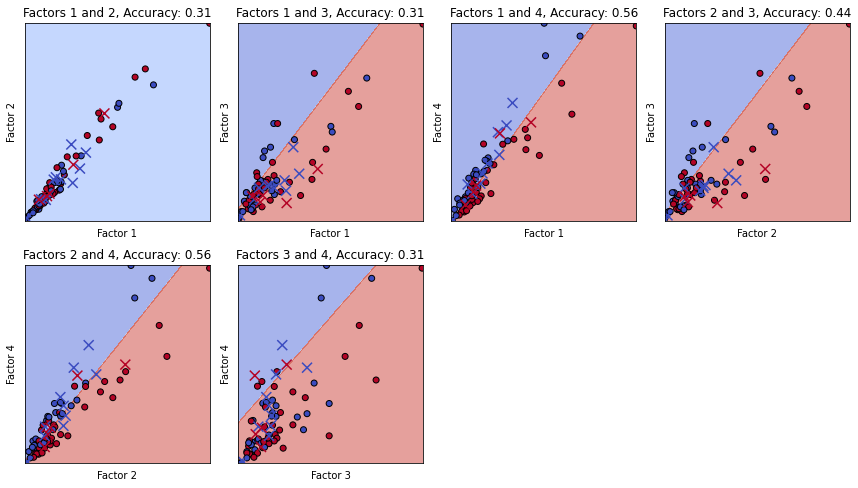

Kernel: poly
Accuracy: 0.3125


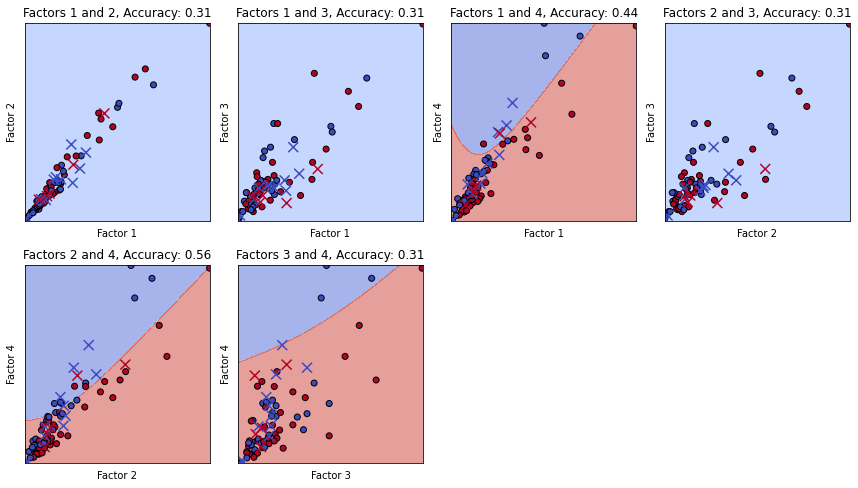

Kernel: rbf
Accuracy: 0.375


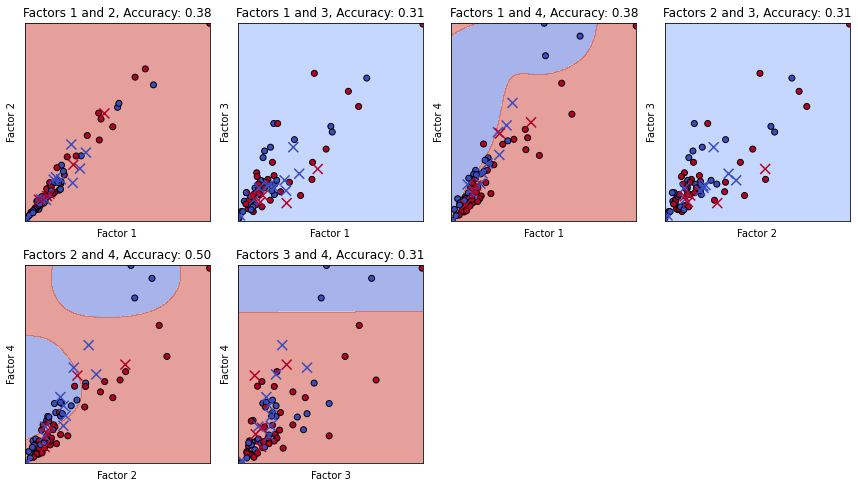

Kernel: sigmoid
Accuracy: 0.3125


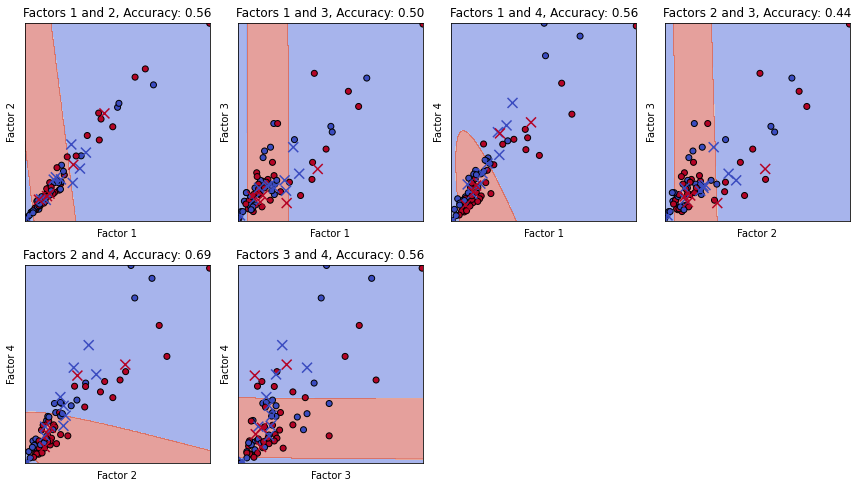

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

'''# Визуализация точечной диаграммы для каждой комбинации факторов
fig, axs = plt.subplots(4, 4, figsize=(20, 20))
for i in range(4):
    for j in range(4):
        axs[i, j].scatter(transformed_data1[:, i], transformed_data1[:, j], color='blue', label='Dostoevsky')
        axs[i, j].scatter(transformed_data2[:, i], transformed_data2[:, j], color='red', label='Others')
        axs[i, j].set_xlabel(f'Factor {i+1}')
        axs[i, j].set_ylabel(f'Factor {j+1}')
        axs[i, j].legend()
plt.tight_layout()
plt.show()'''


# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели SVM с различными ядрами и оценка качества моделей
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f'Kernel: {kernel}')
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Построение графиков SVM с разными цветами для датасетов
    plt.figure(figsize=(12, 10))
    pairs = list(combinations(range(4), 2))
    for i, pair in enumerate(pairs):
        plt.subplot(3, 4, i + 1)
        svm_model = SVC(kernel=kernel)
        svm_model.fit(X_train[:, pair], y_train)
        xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                             np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
        Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        y_pred = svm_model.predict(X_test[:, pair])
        accuracy = accuracy_score(y_test, y_pred)

        # Отображение границ решения и обучающих точек
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
        plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k',label='Data1')
        plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100,label='Data2')
        plt.xlabel(f'Factor {pair[0]+1}')
        plt.ylabel(f'Factor {pair[1]+1}')
        plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())

    plt.tight_layout()
    plt.show()
    

    

    
    
    #plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100)
    #plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm, marker='o', alpha=0.5)

   



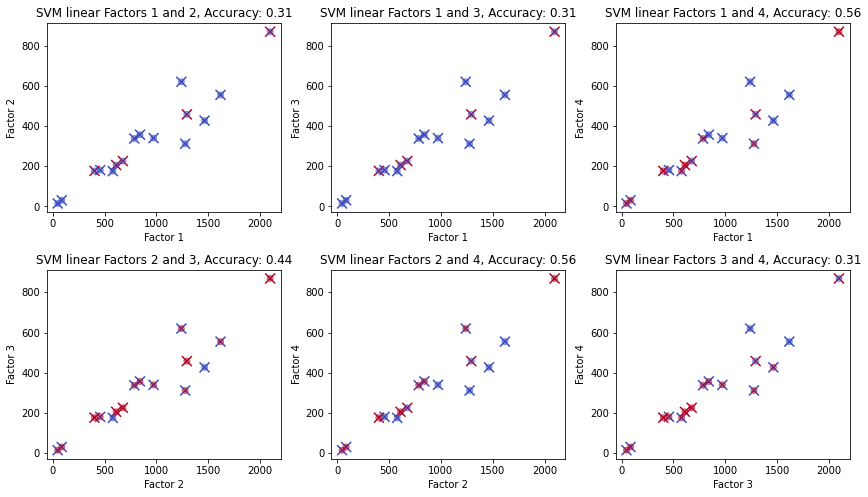

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from itertools import combinations

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)


# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Генерация двух датасетов с 4 факторами каждый
#X1, y1 = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=1)
#X2, y2 = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=2)




# Обучение и оценка модели SVM для каждой комбинации пар факторов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for idx, pair in enumerate(pairs):
    plt.subplot(3, 3, idx + 1)
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train[:, pair], y_train)
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='x', s=100)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm, marker='o', alpha=0.5)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'SVM linear Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')

plt.tight_layout()
plt.show()


Kernel: linear
Accuracy: 0.85


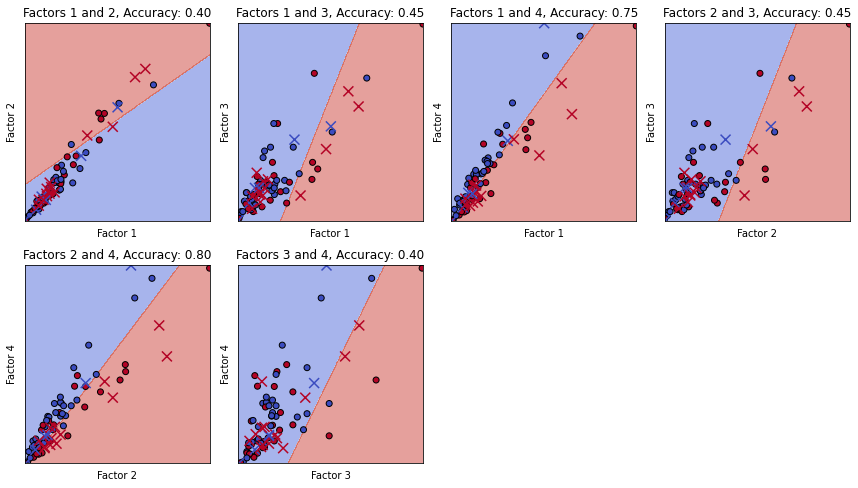

Kernel: poly
Accuracy: 0.9


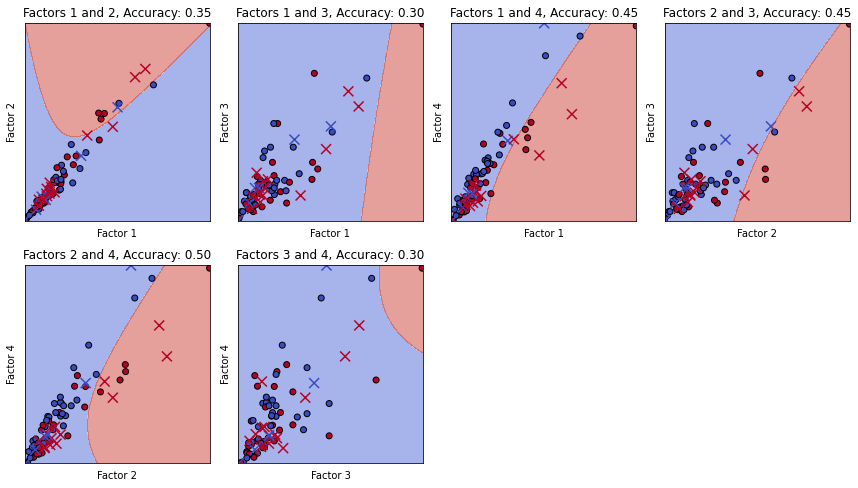

Kernel: rbf
Accuracy: 0.3


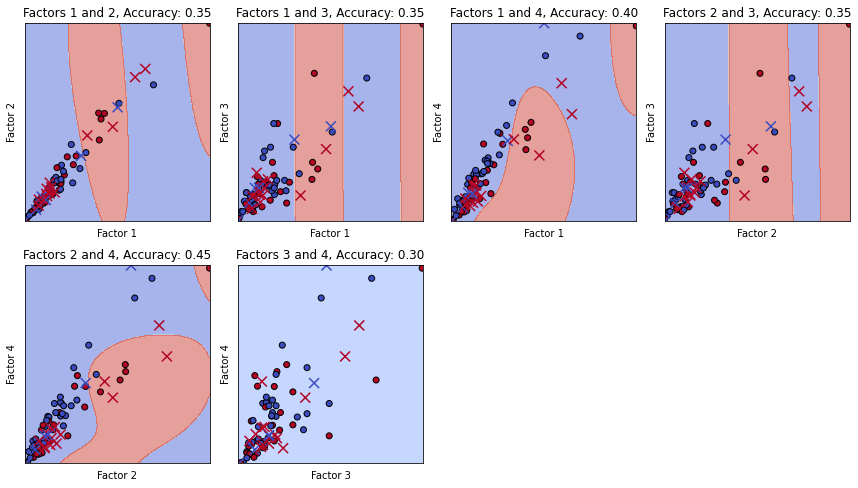

Kernel: sigmoid
Accuracy: 0.3


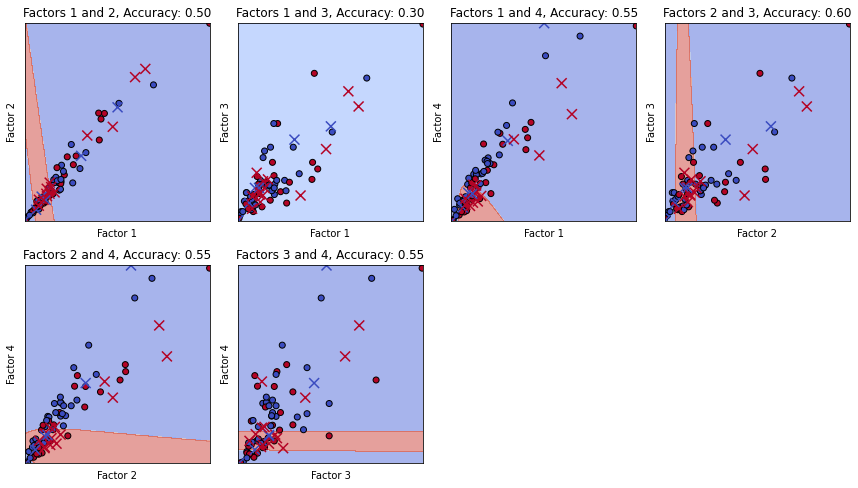

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, )

# Обучение модели SVM с различными ядрами и оценка качества моделей
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    print(f'Kernel: {kernel}')
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
    svm_model = SVC(kernel=kernel, C=0.001)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')

    # Построение графиков SVM с разными цветами для датасетов
    plt.figure(figsize=(12, 10))
    pairs = list(combinations(range(4), 2))
    for i, pair in enumerate(pairs):
        plt.subplot(3, 4, i + 1)
        svm_model = SVC(kernel=kernel)
        svm_model.fit(X_train[:, pair], y_train)
        xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                             np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
        Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        y_pred = svm_model.predict(X_test[:, pair])
        accuracy = accuracy_score(y_test, y_pred)

        # Отображение границ решения и обучающих точек
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
        plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
        plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
        plt.xlabel(f'Factor {pair[0]+1}')
        plt.ylabel(f'Factor {pair[1]+1}')
        plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())

    plt.tight_layout()
    plt.show()

Kernel: linear
Accuracy: 0.7708333333333334
Factors Influence:
Factors 1 and 2: 0.02305598007145271
Factors 2 and 4: 0.011967784927737424
Factors 1 and 4: 0.010779237081039922
Factors 2 and 3: 0.010208406407455906
Factors 3 and 4: 0.006476062997302613
Factors 1 and 3: 0.001049411222422747


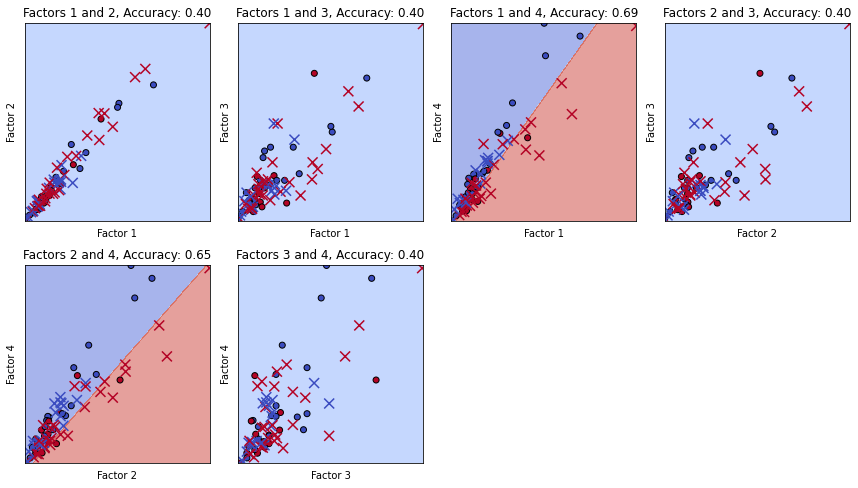

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.6, random_state=1)#test_size=0.33, random_state=42

# Обучение модели SVM с различными ядрами и оценка качества моделей
def get_top_factors_influence(svm_model, pairs):
    factors_influence = {}
    for i, pair in enumerate(pairs):
        abs_coef = np.abs(svm_model.coef_[0][i])  # Абсолютное значение коэффициента
        factors_influence[f'Factors {pair[0]+1} and {pair[1]+1}'] = abs_coef
    sorted_factors = sorted(factors_influence.items(), key=lambda x: x[1], reverse=True)
    return [f'{factor}: {influence}' for factor, influence in sorted_factors]

print(f'Kernel: linear')
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Получение списка строк с воздействием факторов на модель
top_factors_influence = get_top_factors_influence(svm_model, pairs)
print("Factors Influence:")
for factor in top_factors_influence:
    print(factor)

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                             np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

Kernel: linear
Accuracy: 0.8518518518518519
Factors 1 and 2, Accuracy: 0.59
Points reflected from dataset 1: [0, 1, 3, 7, 12]
Points reflected from dataset 0: [2, 9, 10, 11, 13, 14, 16, 17, 21, 24, 25]
Factors 1 and 3, Accuracy: 0.63
Points reflected from dataset 1: [0, 1, 3, 7, 12]
Points reflected from dataset 0: [2, 9, 10, 11, 13, 14, 16, 17, 21, 23, 24, 25]
Factors 1 and 4, Accuracy: 0.81
Points reflected from dataset 1: [0, 1, 3, 4, 5, 6, 12, 15, 19, 20, 22]
Points reflected from dataset 0: [2, 9, 10, 11, 13, 14, 16, 17, 21, 23, 25]
Factors 2 and 3, Accuracy: 0.63
Points reflected from dataset 1: [0, 1, 3, 7, 12]
Points reflected from dataset 0: [2, 9, 10, 11, 13, 14, 16, 17, 21, 23, 24, 25]
Factors 2 and 4, Accuracy: 0.59
Points reflected from dataset 1: [0, 1, 3, 4, 5, 6, 7, 12, 15, 22]
Points reflected from dataset 0: [9, 10, 11, 13, 16, 25]
Factors 3 and 4, Accuracy: 0.48
Points reflected from dataset 0: [2, 9, 10, 11, 14, 16, 17, 23, 24, 25]
Points reflected from dataset 1: [

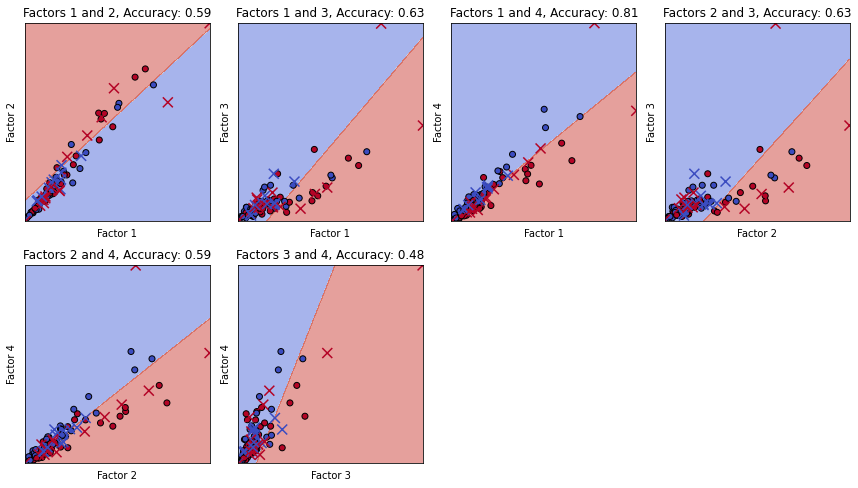

Выбранные строки из датасета 1:
     Factor1  Factor2  Factor3  Factor4
32       NaN      NaN      NaN      NaN
35       NaN      NaN      NaN      NaN
44       NaN      NaN      NaN      NaN
46       NaN      NaN      NaN      NaN
76       NaN      NaN      NaN      NaN
86       NaN      NaN      NaN      NaN
96       NaN      NaN      NaN      NaN
97       NaN      NaN      NaN      NaN
99       NaN      NaN      NaN      NaN
130      NaN      NaN      NaN      NaN
Выбранные строки из датасета 2:
     Factor1  Factor2  Factor3  Factor4
24       NaN      NaN      NaN      NaN
39       NaN      NaN      NaN      NaN
89       NaN      NaN      NaN      NaN
85       NaN      NaN      NaN      NaN
90       NaN      NaN      NaN      NaN
111      NaN      NaN      NaN      NaN
115      NaN      NaN      NaN      NaN
117      NaN      NaN      NaN      NaN
141      NaN      NaN      NaN      NaN
146      NaN      NaN      NaN      NaN
238      NaN      NaN      NaN      NaN


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=1)#test_size=0.33, random_state=42



print(f'Kernel: linear')
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
svm_model = SVC(kernel='linear', C=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


def print_reflected_indices(X_test, y_test, y_pred):
    reflected_indices = {}
    for idx, (test_point, pred_label) in enumerate(zip(X_test, y_pred)):
        true_label = y_test[idx]
        if pred_label == true_label:
            if true_label not in reflected_indices:
                reflected_indices[true_label] = [idx]
            else:
                reflected_indices[true_label].append(idx)
    for label, indices in reflected_indices.items():
        print(f'Points reflected from dataset {label}: {indices}')

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                         np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    print_reflected_indices(X_test[:, pair], y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

# Вывод определенных строк из датасета
def print_selected_rows(dataset, indices):
    selected_rows = dataset.iloc[indices]
    print(selected_rows)

# Вставить нужные строчки, выбрав 
print("Выбранные строки из датасета 1:")
print_selected_rows(df1, [1, 2, 8, 10, 12, 15, 16, 17, 18, 21])

print("Выбранные строки из датасета 2:")
print_selected_rows(df2,  [0, 3, 4, 5, 6, 7, 9, 11, 13, 14, 22])



Kernel: poly
Accuracy: 0.375


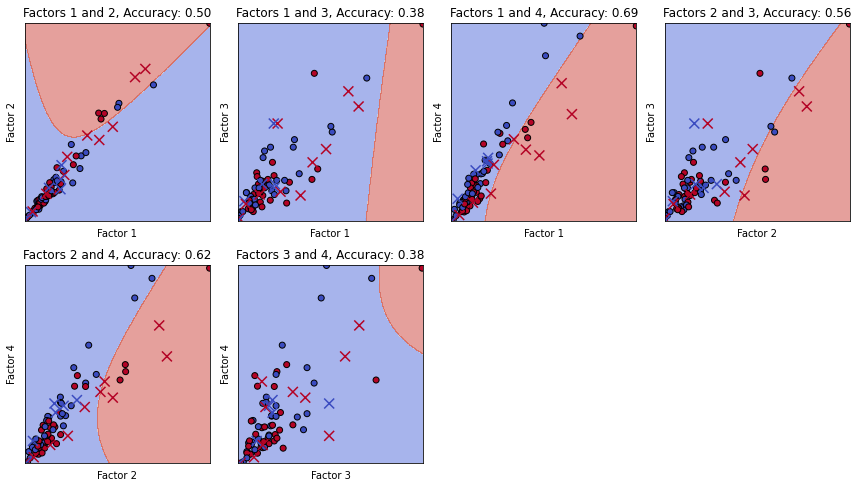

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1 )#test_size=0.33, random_state=42

# Обучение модели SVM с различными ядрами и оценка качества моделей

print(f'Kernel: poly'), 
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
'''degree полиномиальное ядро 3-й степени. 
Гиперпараметр coef0 управляет тем, насколько сильно полиномы высокой степени влияют
на модель в сравнении с полиномами низкой степени.'''
svm_model = SVC(kernel='poly',  degree=3, coef0=1, C=0.001)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='poly')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                             np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

Kernel: rbf
Accuracy: 0.375


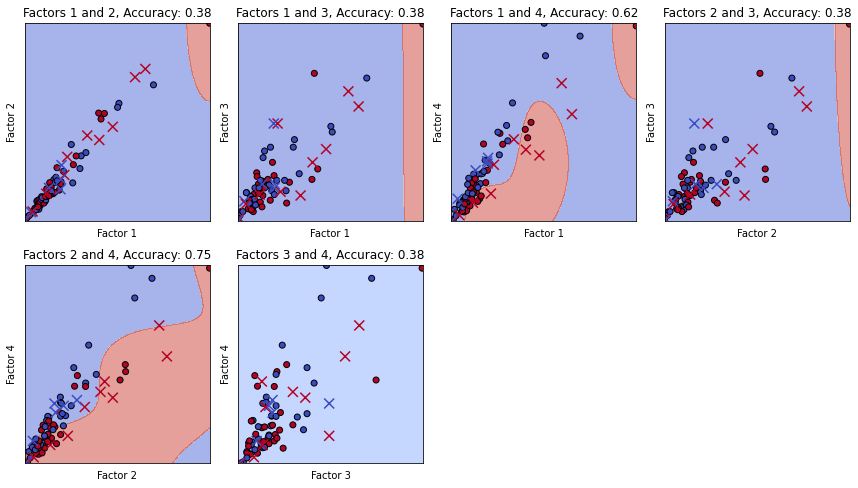

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]

from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)#test_size=0.33, random_state=42

# Обучение модели SVM с различными ядрами и оценка качества моделей

print(f'Kernel: rbf') 
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
'''Увеличение gamma приводит к сужению колоколообразной кривой, в результате чего сфера влияния каждого образца
уменьшается: граница решений становится более неравномерной, извивающейся вблизи индивидуальных образцов'''
svm_model = SVC(kernel='rbf',  gamma=6, C=0.001)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='rbf')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                             np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()

Kernel: sigmoid
Accuracy: 0.375


AttributeError: coef_ is only available when using a linear kernel

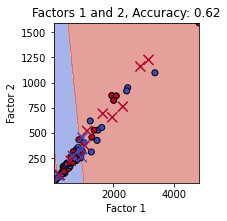

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

# данных для двух датасетов с разным количеством строк
dataset1 = df.head(50)
dataset2 = df.tail(df.shape[0] - 50)

# Создание датафреймов из сгенерированных данных
df1 = pd.DataFrame(dataset1, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df2 = pd.DataFrame(dataset2, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])

# Факторный анализ для каждого датасета
fa1 = FactorAnalysis(n_components=4, rotation='varimax')
fa2 = FactorAnalysis(n_components=4, rotation='varimax')
transformed_data1 = fa1.fit_transform(dataset1)
transformed_data2 = fa2.fit_transform(dataset2)

# Приведение размеров датасетов к одному размеру
min_len = min(len(dataset1), len(dataset2))
dataset1 = dataset1[:min_len]
dataset2 = dataset2[:min_len]




from itertools import combinations

# Объединение датасетов
X = np.concatenate([dataset1, dataset2])
y = np.array([0] * min_len + [1] * min_len)  # Метки классов: 0 для dataset1, 1 для dataset2

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=1)#test_size=0.33, random_state=42

# Обучение модели SVM с различными ядрами и оценка качества моделей

print(f'Kernel: sigmoid')
#балансом, используя гиперпараметр C: 
#меньшее значение C ведет к более широкой полосе, но большему числу нарушений зазора. 
svm_model = SVC(kernel='sigmoid',  C=0.01)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

"""# Получение списка строк с воздействием факторов на модель
top_factors_influence = get_top_factors_influence(svm_model, pairs)
print("Factors Influence:")
for factor in top_factors_influence:
    print(factor)

# Построение графиков SVM с разными цветами для датасетов
plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='sigmoid')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                             np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()"""

def important_rows_indices(model, X, n=10):
    coef_abs = np.abs(model.coef_).flatten()  # Абсолютные значения коэффициентов
    sorted_indices = np.argsort(coef_abs)[::-1]  # Индексы, отсортированные по убыванию важности
    top_indices = sorted_indices[:n]  # Топ n индексов
    return top_indices

plt.figure(figsize=(12, 10))
pairs = list(combinations(range(4), 2))
for i, pair in enumerate(pairs):
    plt.subplot(3, 4, i + 1)
    svm_model = SVC(kernel='sigmoid')
    svm_model.fit(X_train[:, pair], y_train)
    xx, yy = np.meshgrid(np.linspace(X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1, 500),
                             np.linspace(X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1, 500))
    Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    y_pred = svm_model.predict(X_test[:, pair])
    accuracy = accuracy_score(y_test, y_pred)

    # Отображение границ решения и обучающих точек
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X_train[:, pair[0]], X_train[:, pair[1]], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.scatter(X_test[:, pair[0]], X_test[:, pair[1]], c=y_test, cmap=plt.cm.coolwarm,marker='x',  s=100)
    plt.xlabel(f'Factor {pair[0]+1}')
    plt.ylabel(f'Factor {pair[1]+1}')
    plt.title(f'Factors {pair[0]+1} and {pair[1]+1}, Accuracy: {accuracy:.2f}')

    # Вывод списка важных индексов строк
    top_indices = important_rows_indices(svm_model, X_train[:, pair])
    print(f"Factors {pair[0]+1} and {pair[1]+1}: {top_indices}")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()
plt.show()
